In [10]:
import os
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
# Replace with the path to your converted HDF5 file
hdf5_file_path = '/Volumes/LaCie/Deep_Learning_Final_Project/Machine/Earth_Data2.0/MOD14.A2000058.0515.061.2020037091654.h5'

with h5py.File(hdf5_file_path, 'r') as file:
    # Print all dataset names
    print("Datasets in the HDF5 file:")
    for name in file:
        print(name)
    # Load a dataset (assuming 'fire mask' exists in HDF5 as well)
    fire_mask = file['fire mask'][()]

Datasets in the HDF5 file:
CMG_night
FP_AdjCloud
FP_AdjWater
FP_CMG_col
FP_CMG_row
FP_MAD_DT
FP_MAD_R2
FP_MAD_T21
FP_MAD_T31
FP_MeanDT
FP_MeanR2
FP_MeanT21
FP_MeanT31
FP_NumValid
FP_R2
FP_RelAzAng
FP_SolZenAng
FP_T21
FP_T31
FP_ViewZenAng
FP_WinSize
FP_confidence
FP_land
FP_latitude
FP_line
FP_longitude
FP_power
FP_sample
algorithm QA
cmg_cells_night
cmg_values
fire mask
number_of_active_fires
number_of_scan_lines
pixels_per_scan_line


In [12]:
def perform_eda(file_path):
    with h5py.File(file_path, 'r') as hdf:
        print("Keys in the HDF5 file:", list(hdf.keys()))
        first_key = list(hdf.keys())[0]

        # Modify this part to suit the structure of your data
        data = np.array(hdf[first_key])
        print("Data shape:", data.shape)
        # Basic statistical analysis
        # Visualization (customize according to your data's nature)
        # plt.hist(data)
        # plt.show()

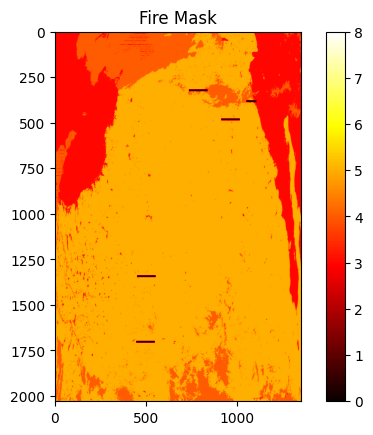

In [13]:
# Visualize the 'fire mask' dataset
plt.imshow(fire_mask, cmap='hot')  # 'hot' colormap is good for heatmaps
plt.colorbar()
plt.title('Fire Mask')
plt.show()

T21 Data statistics:
Min: 305.27615
Max: 309.51813
Mean: 306.75684
Median: 306.1165

Confidence Data statistics:
Min: 64
Max: 78
Mean: 69.0
Median: 67.0


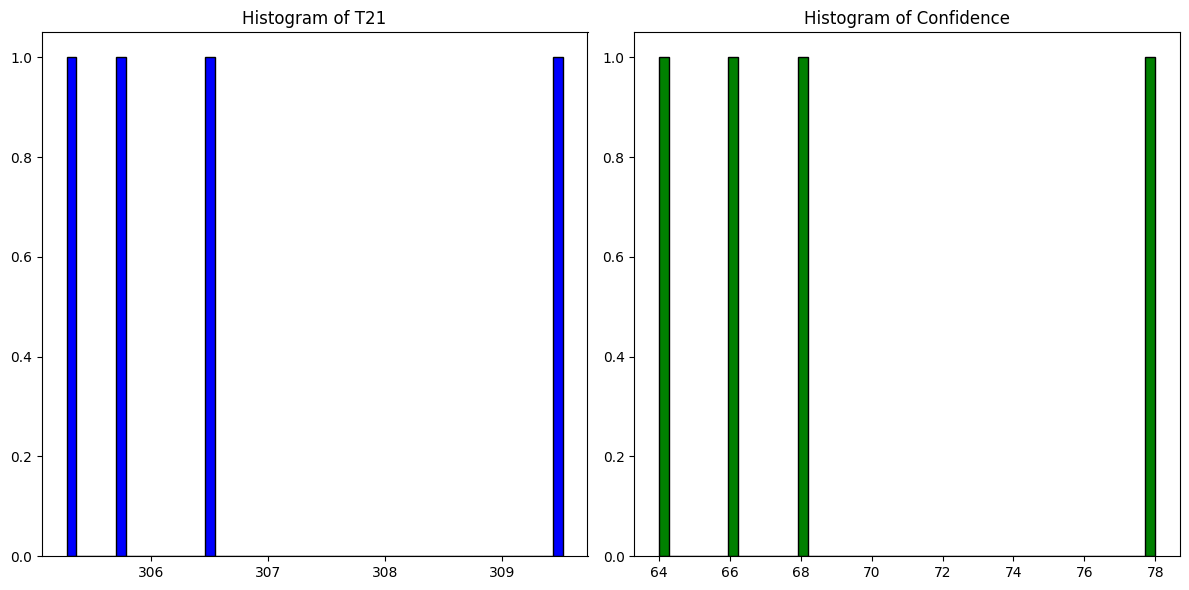

In [14]:
def perform_eda(file_path):
    with h5py.File(file_path, 'r') as hdf:
        # Assuming 'FP_T21' and 'FP_confidence' are the datasets of interest
        t21_data = np.array(hdf['FP_T21'])
        confidence_data = np.array(hdf['FP_confidence'])
        
        # Mask to ignore NaN values if present
        mask = ~np.isnan(t21_data)
        
        print("T21 Data statistics:")
        print("Min:", np.min(t21_data[mask]))
        print("Max:", np.max(t21_data[mask]))
        print("Mean:", np.mean(t21_data[mask]))
        print("Median:", np.median(t21_data[mask]))
        
        print("\nConfidence Data statistics:")
        print("Min:", np.min(confidence_data[mask]))
        print("Max:", np.max(confidence_data[mask]))
        print("Mean:", np.mean(confidence_data[mask]))
        print("Median:", np.median(confidence_data[mask]))
        
        # Histograms
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        plt.hist(t21_data[mask].flatten(), bins=50, color='blue', edgecolor='black')
        plt.title('Histogram of T21')

        plt.subplot(1, 2, 2)
        plt.hist(confidence_data[mask].flatten(), bins=50, color='green', edgecolor='black')
        plt.title('Histogram of Confidence')

        plt.tight_layout()
        plt.show()

perform_eda('/Volumes/LaCie/Deep_Learning_Final_Project/Machine/Earth_Data2.0/MOD14.A2000058.0515.061.2020037091654.h5')


T21 Data statistics:
Min: 305.27615
Max: 309.51813
Mean: 306.75684
Median: 306.1165

Confidence Data statistics:
Min: 64
Max: 78
Mean: 69.0
Median: 67.0


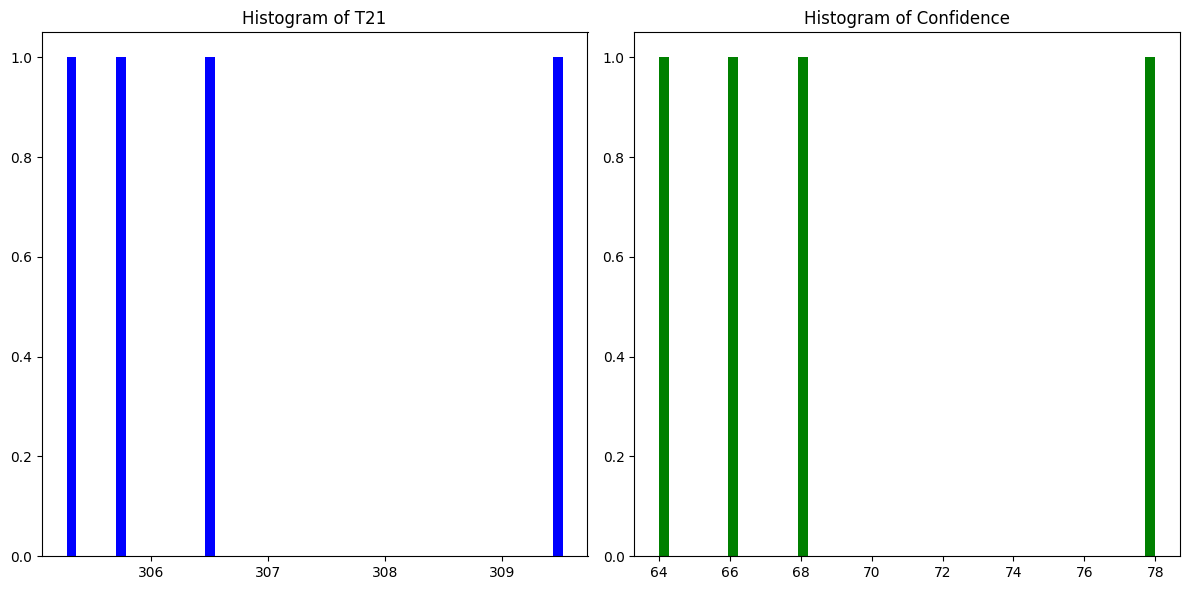

In [15]:
def perform_eda(file_path):
    with h5py.File(file_path, 'r') as hdf:
        # EDA for T21
        t21 = np.array(hdf['FP_T21'])
        t21 = t21[~np.isnan(t21)]  # Remove NaN values for valid statistics
        
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        plt.hist(t21, bins=50, color='blue')
        plt.title('Histogram of T21')
        
        print("T21 Data statistics:")
        print("Min:", np.min(t21))
        print("Max:", np.max(t21))
        print("Mean:", np.mean(t21))
        print("Median:", np.median(t21))
        
        # EDA for Confidence
        confidence = np.array(hdf['FP_confidence'])
        confidence = confidence[~np.isnan(confidence)]  # Remove NaN values
        
        plt.subplot(1, 2, 2)
        plt.hist(confidence, bins=50, color='green')
        plt.title('Histogram of Confidence')
        
        print("\nConfidence Data statistics:")
        print("Min:", np.min(confidence))
        print("Max:", np.max(confidence))
        print("Mean:", np.mean(confidence))
        print("Median:", np.median(confidence))

        plt.tight_layout()
        plt.show()

# Replace with the path to your HDF5 file
hdf5_file_path = '/Volumes/LaCie/Deep_Learning_Final_Project/Machine/Earth_Data2.0/MOD14.A2000058.0515.061.2020037091654.h5'
perform_eda(hdf5_file_path)

In [16]:
with h5py.File(hdf5_file_path, 'r') as file:
    # Print all attributes (metadata) in the root group
    print("Metadata for the HDF5 file:")
    for key, value in file.attrs.items():
        print(f"{key}: {value}")


Metadata for the HDF5 file:
FirePix: 4
LandFirePix: 4
WaterFirePix: 0
MissingPix: 5404
LandPix: 2213502
WaterPix: 508228
CoastPix: 21486
WaterAdjacentFirePix: 0
CloudAdjacentFirePix: 0
UnknownLandPix: 0
UnknownWaterPix: 27734
LandCloudPix: 207417
WaterCloudPix: 81138
GlintPix: 0
GlintRejectedPix: 0
CoastRejectedLandPix: 0
HotSurfRejectedPix: 0
ClearingRejectedPix: 0
CoastRejectedWaterPix: 0
DayPix: 0
NightPix: 2748620
MissingRadPix: 5404
MissingGeoPix: 0
Satellite: b'Terra'
ProcessVersionNumber: b'6.2.3'
MOD021KM input file: b'/MODAPSops/archive/f7259/running/AM1M_C61_L1mc/14587168/MOD021KM.A2000058.0515.061.2017171202058.hdf'
MOD03 input file: b'/MODAPSops/archive/f7259/running/AM1M_C61_L1mc/14587168/MOD03.A2000058.0515.061.2017171193308.hdf'
SystemID: b'Linux minion7259 3.10.0-1062.9.1.el7.x86_64 #1 SMP Fri Dec 6 15:49:49 UTC 2019 x86_64'
identifier_product_doi: b'10.5067/MODIS/MOD14.061'
identifier_product_doi_authority: b'http://dx.doi.org'
CoreMetadata.0: b'\nGROUP                

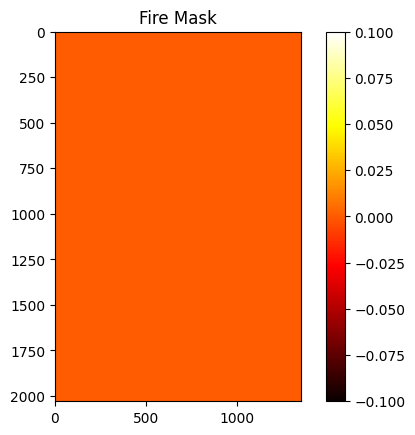

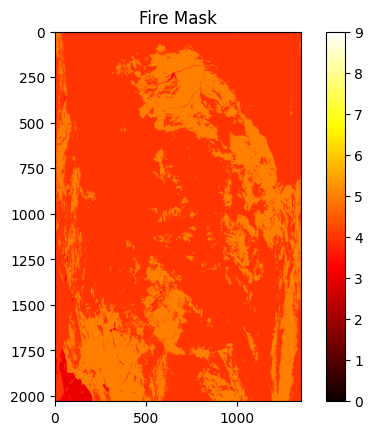

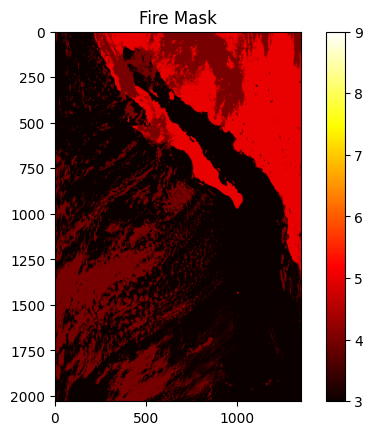

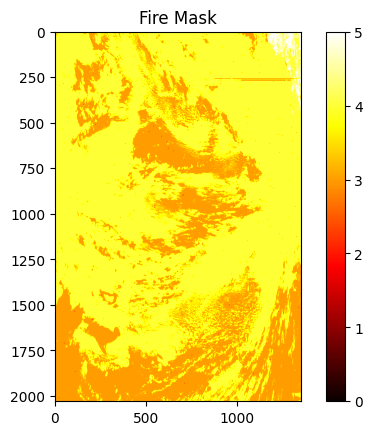

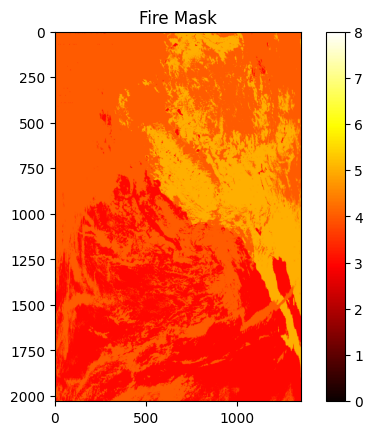

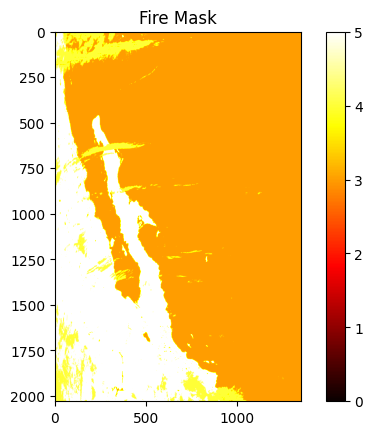

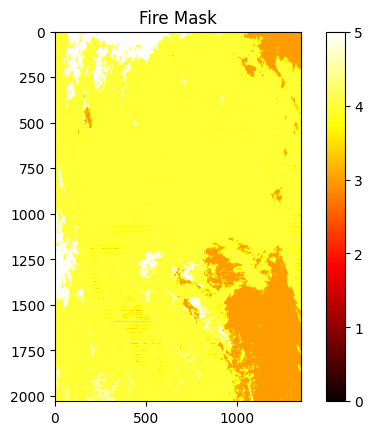

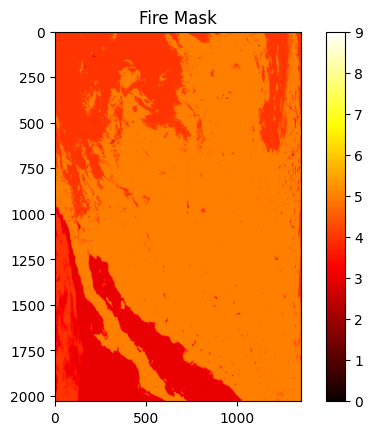

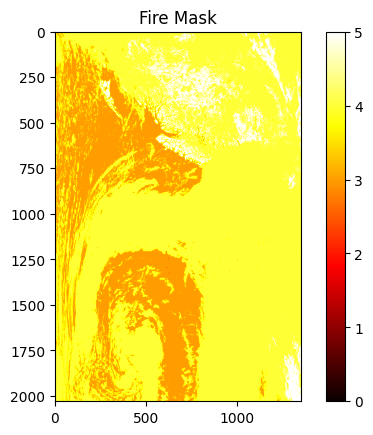

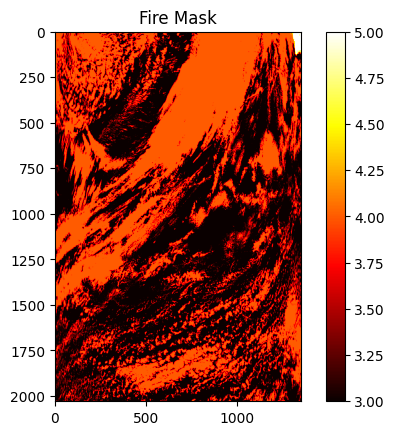

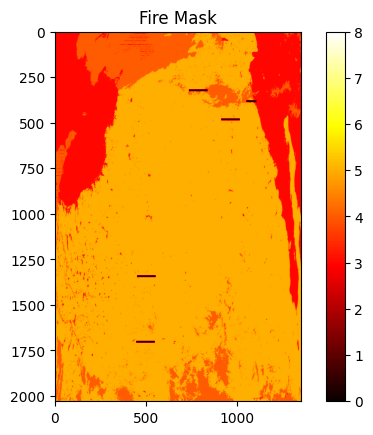

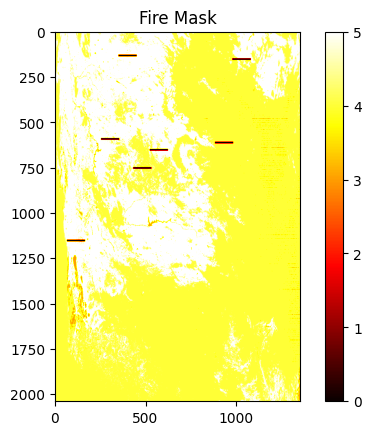

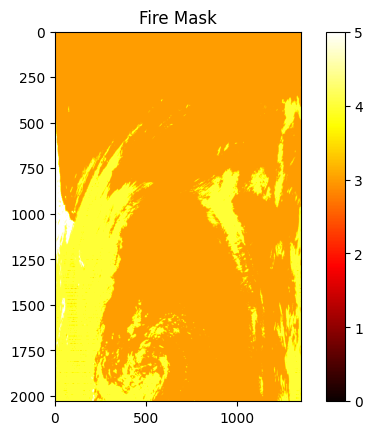

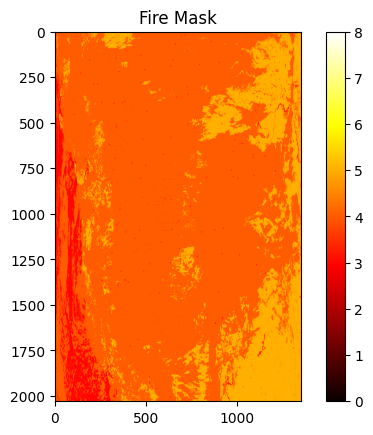

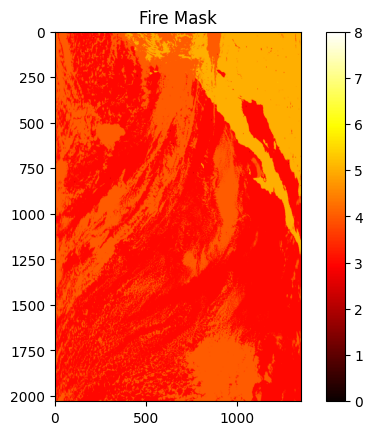

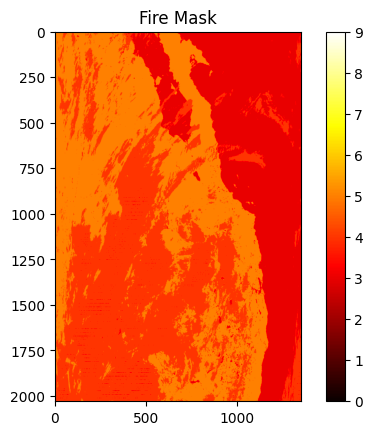

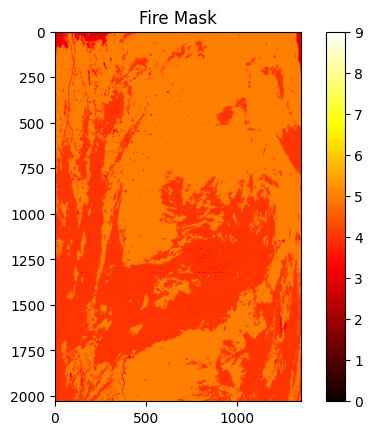

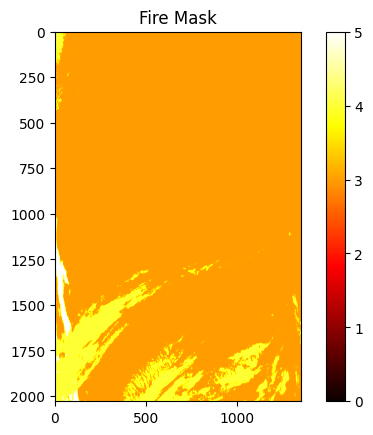

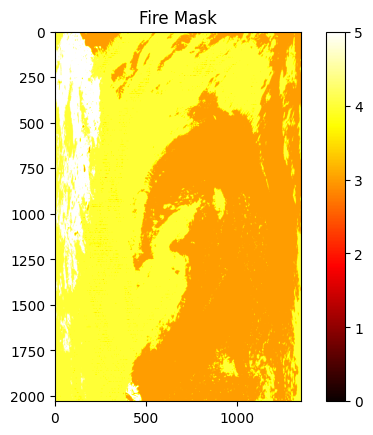

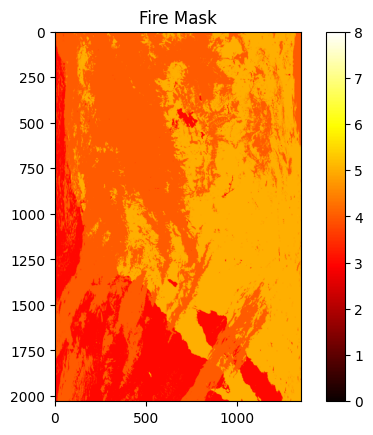

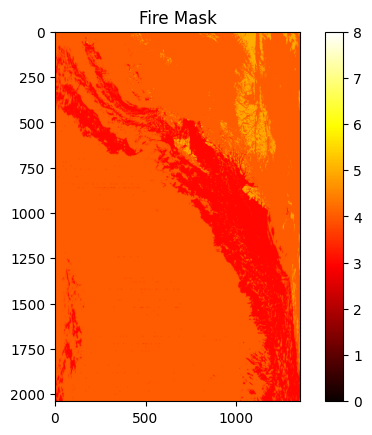

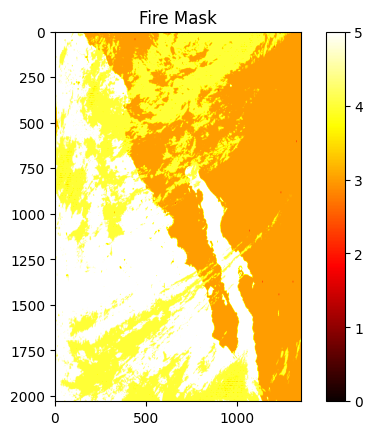

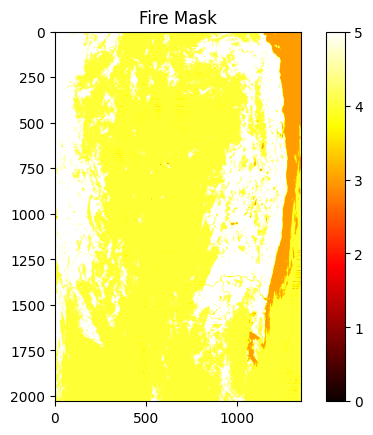

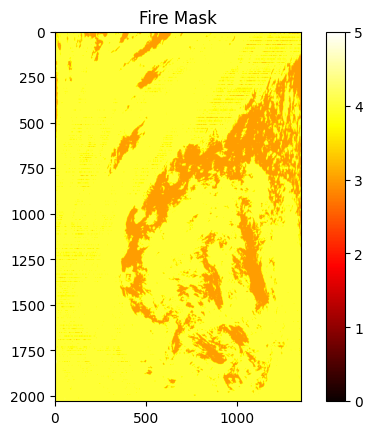

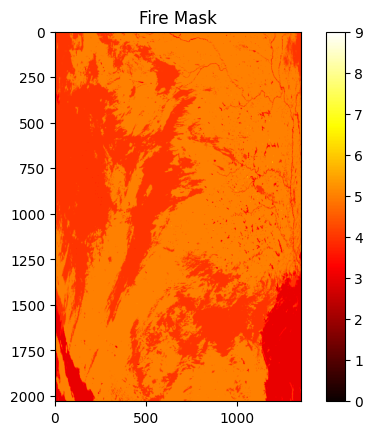

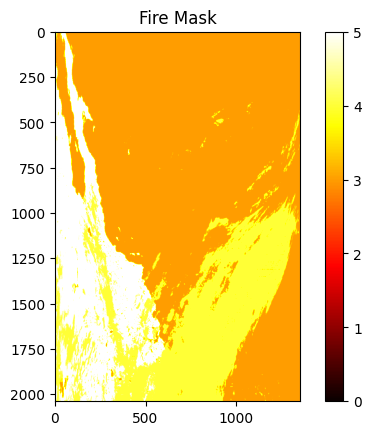

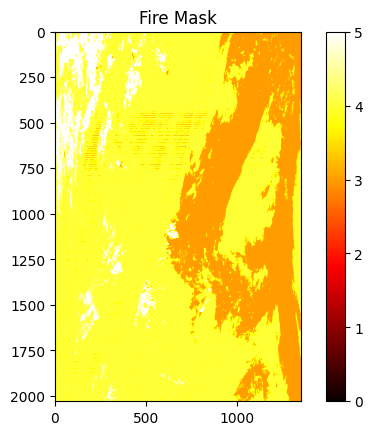

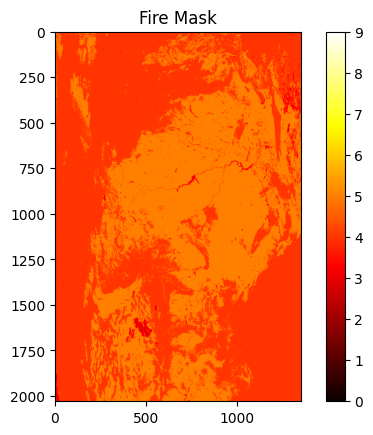

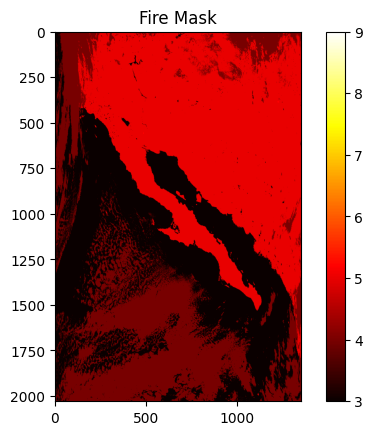

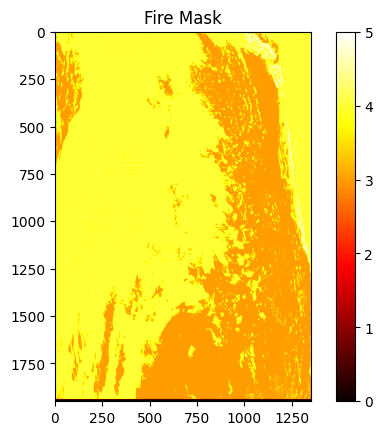

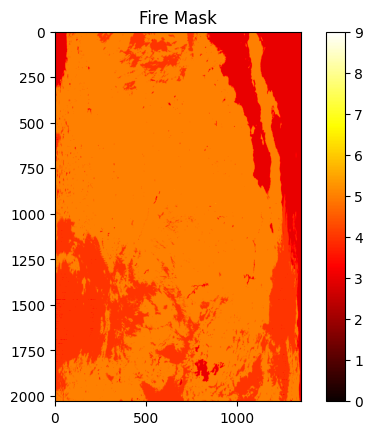

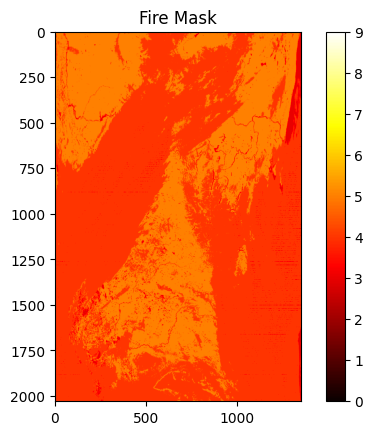

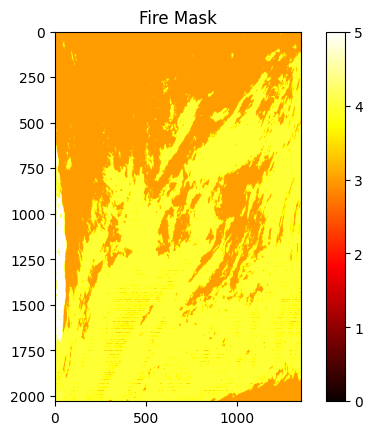

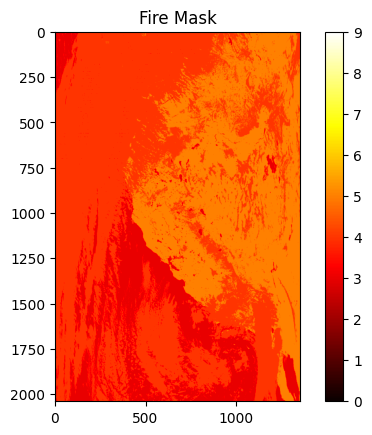

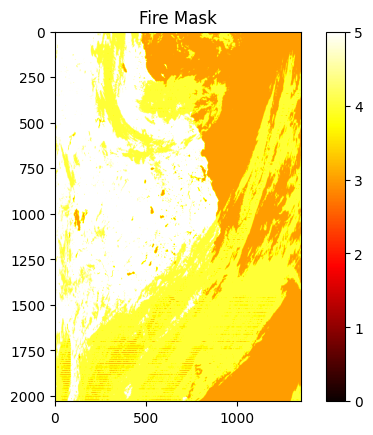

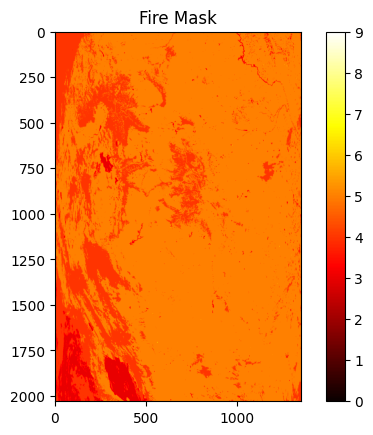

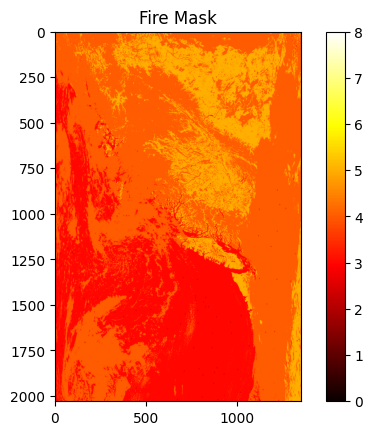

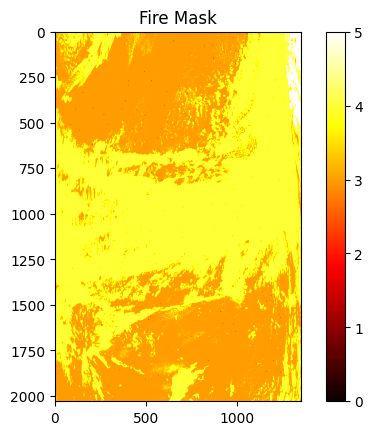

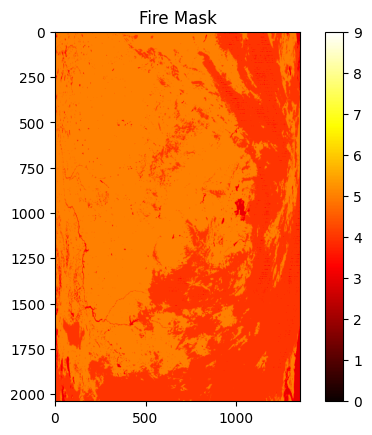

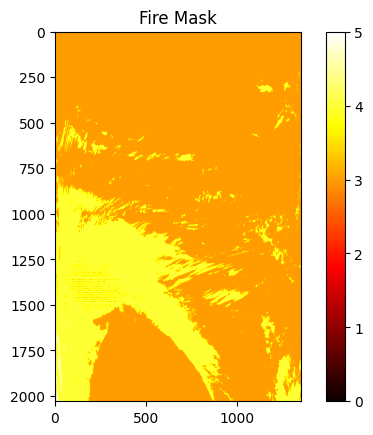

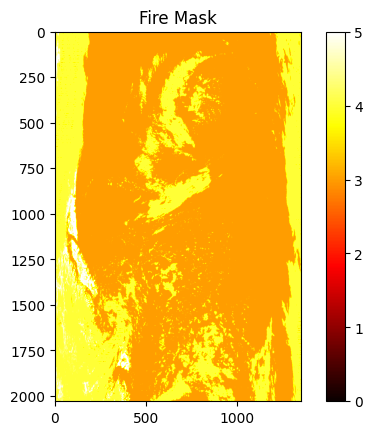

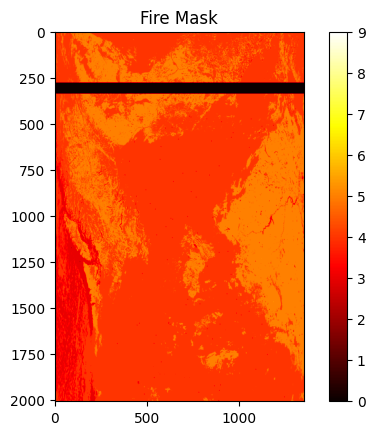

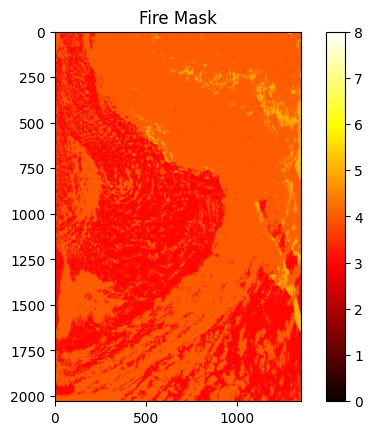

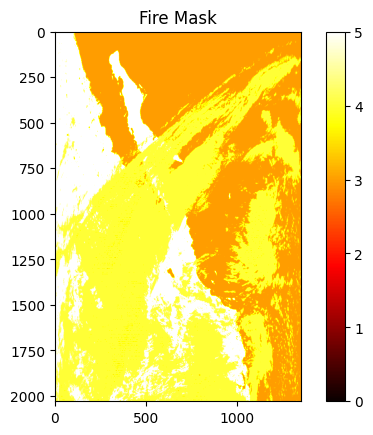

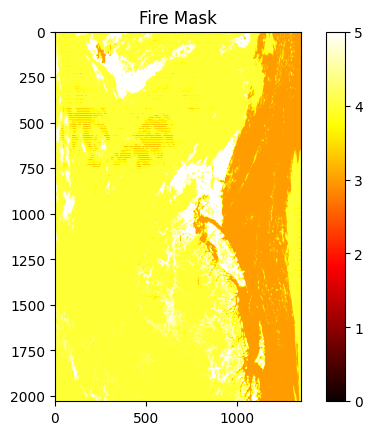

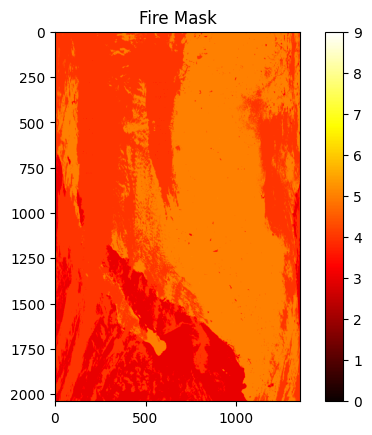

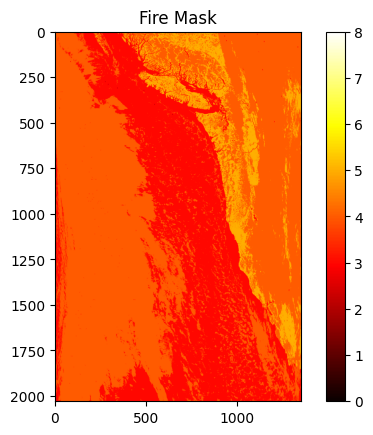

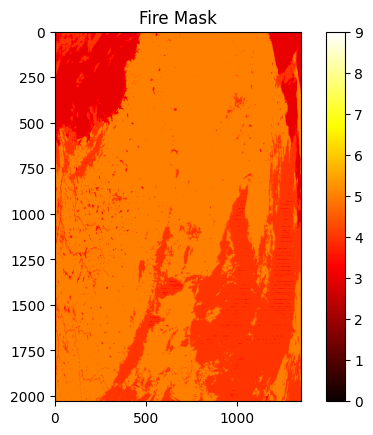

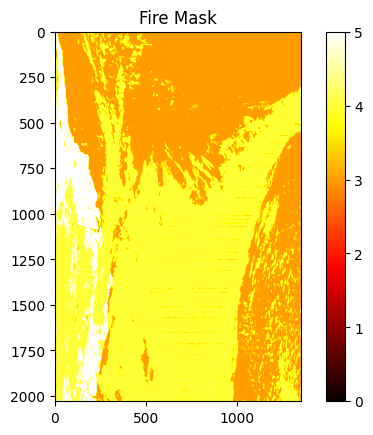

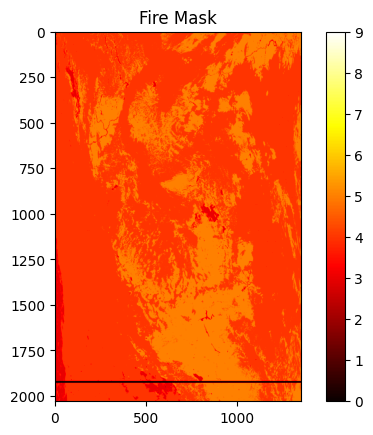

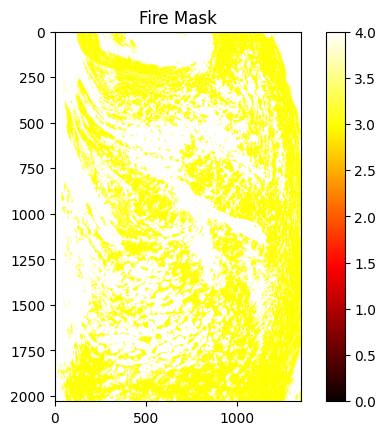

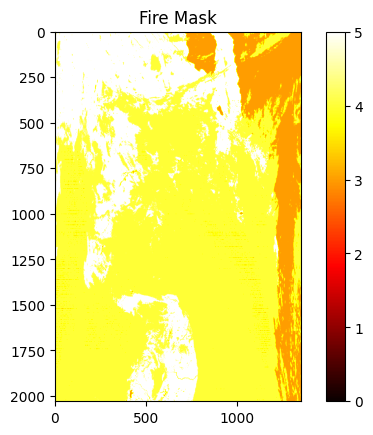

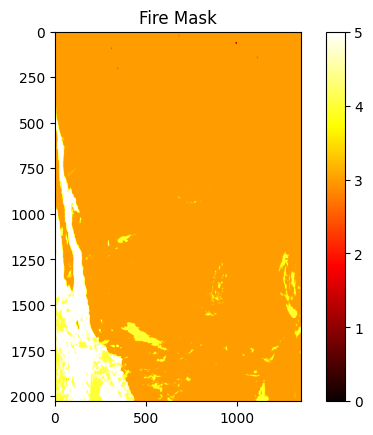

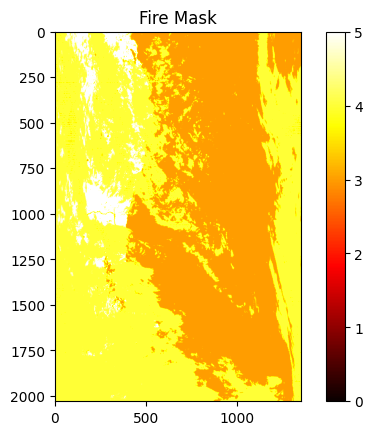

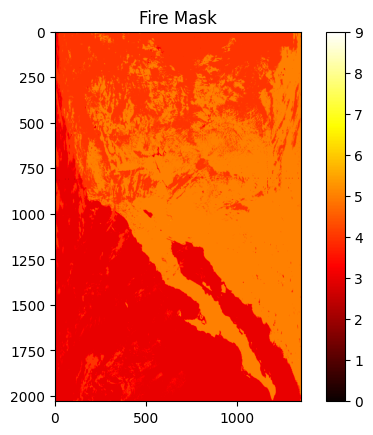

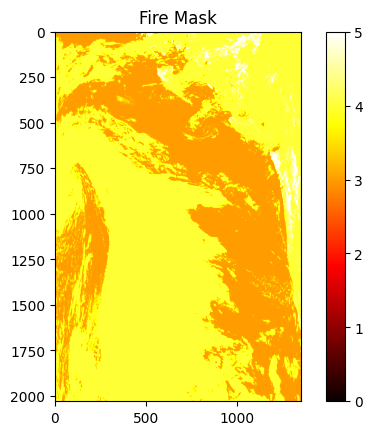

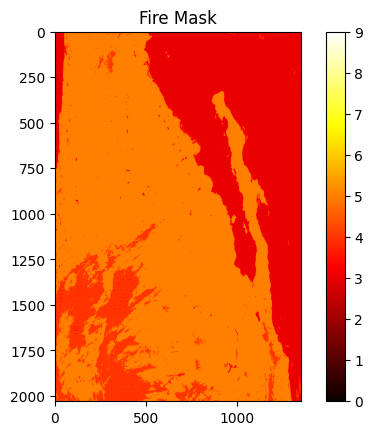

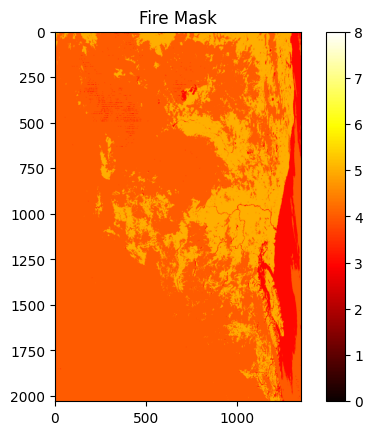

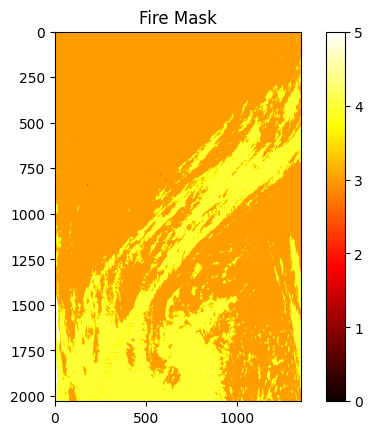

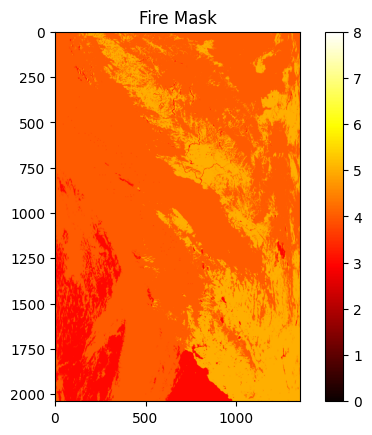

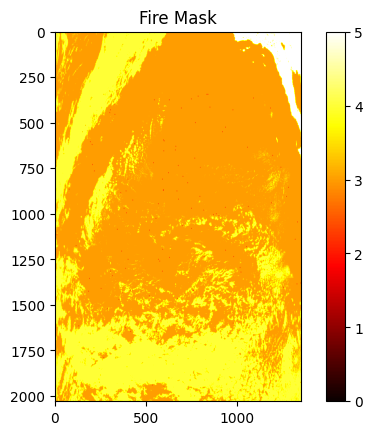

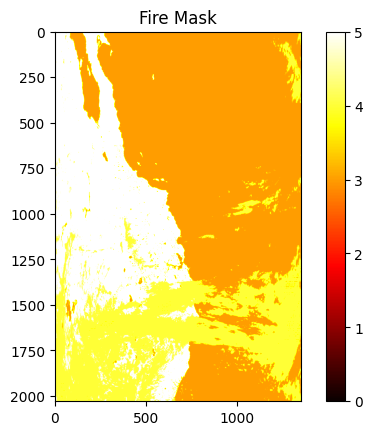

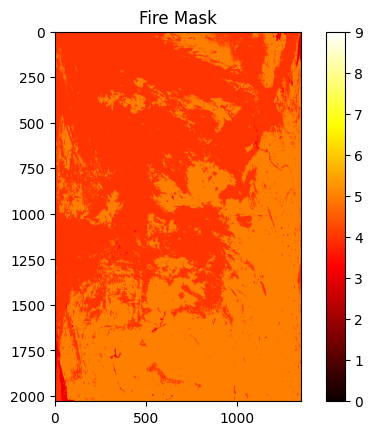

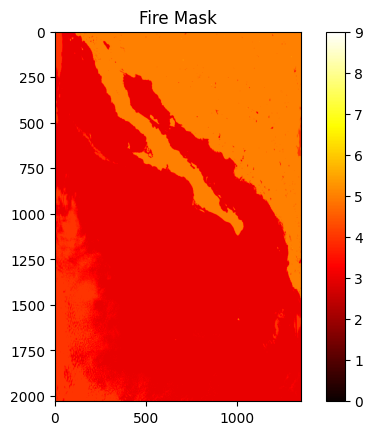

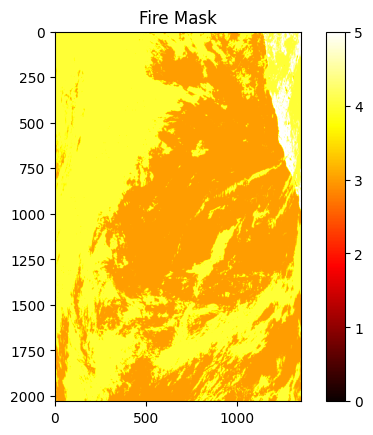

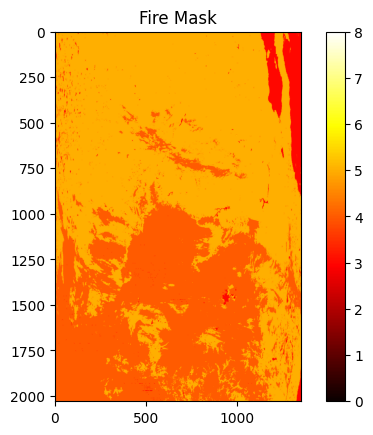

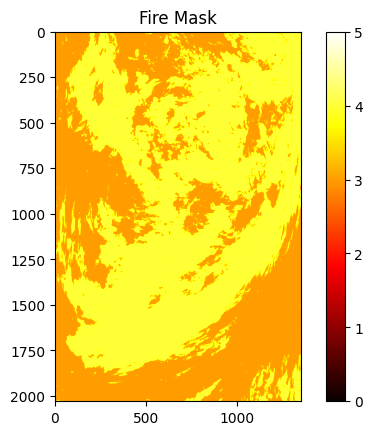

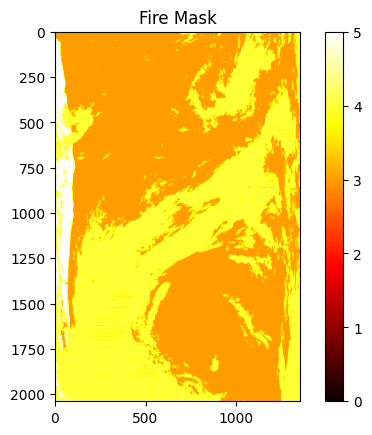

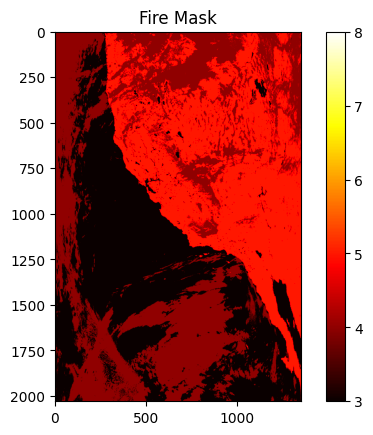

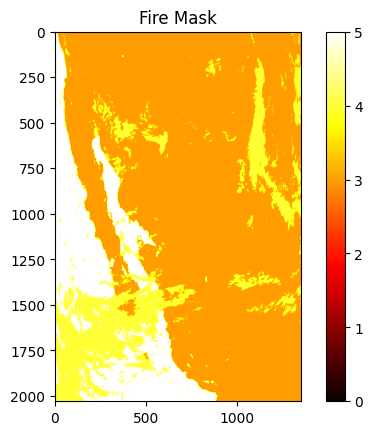

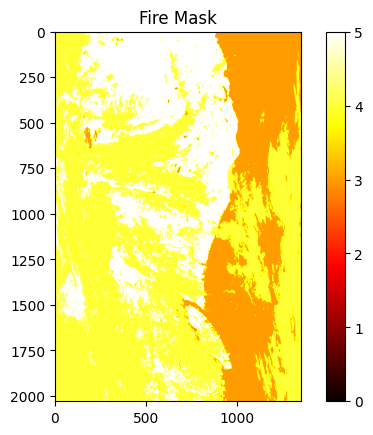

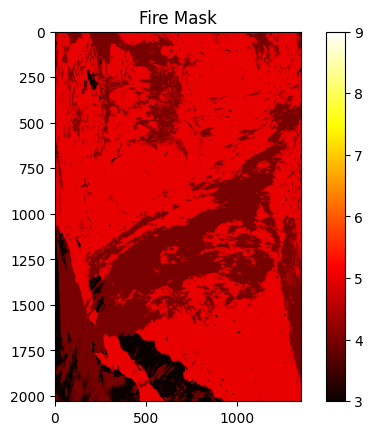

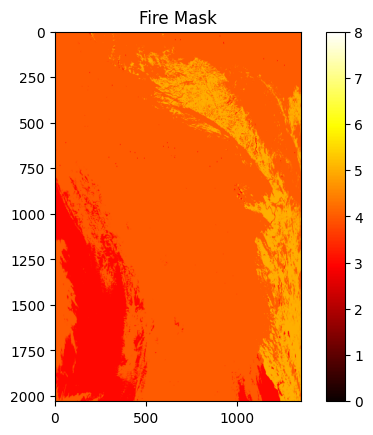

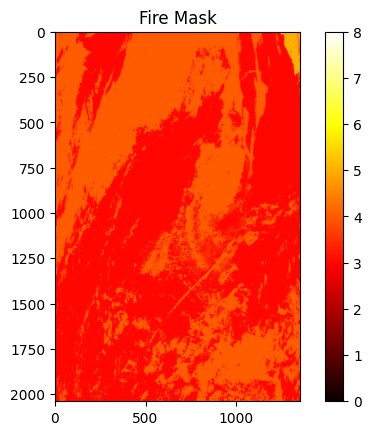

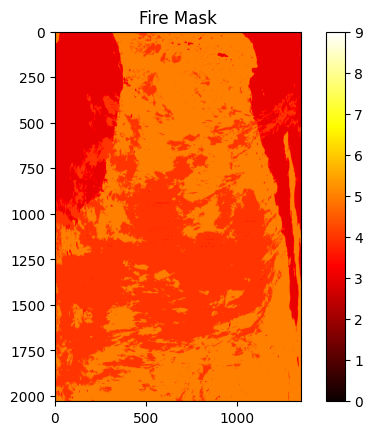

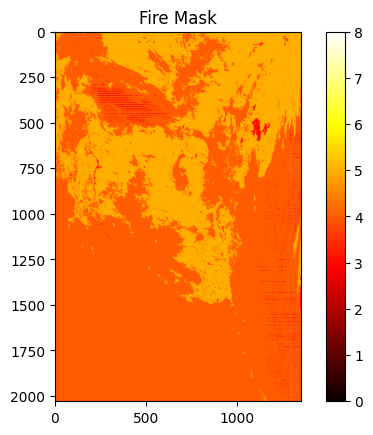

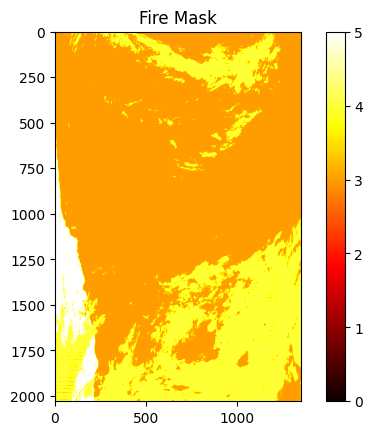

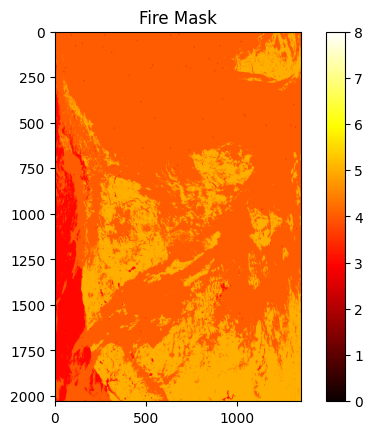

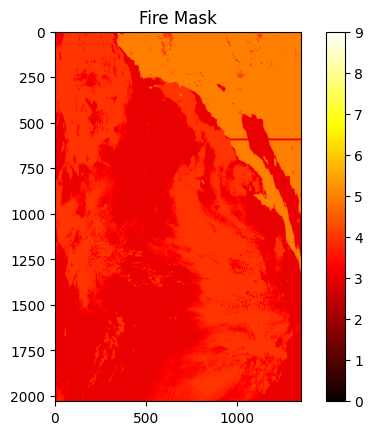

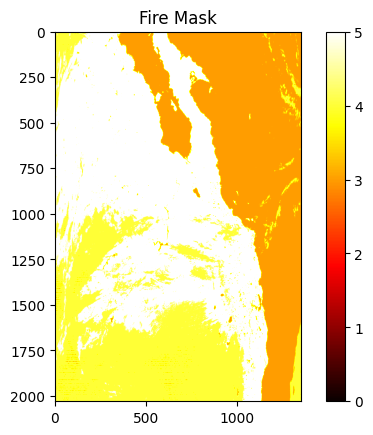

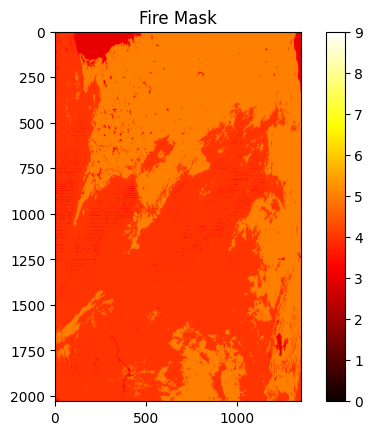

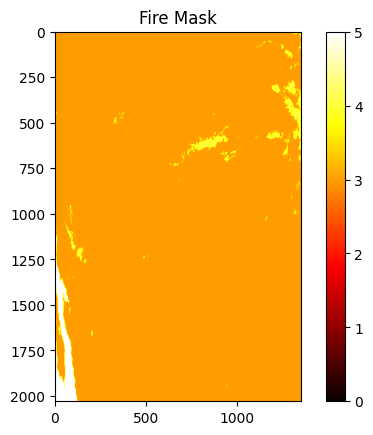

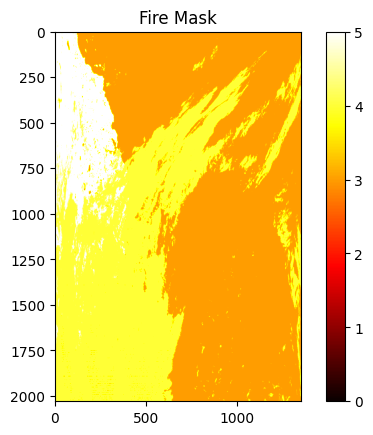

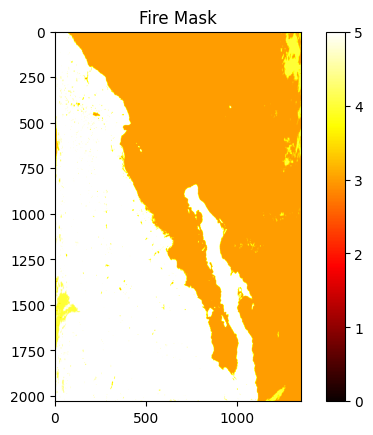

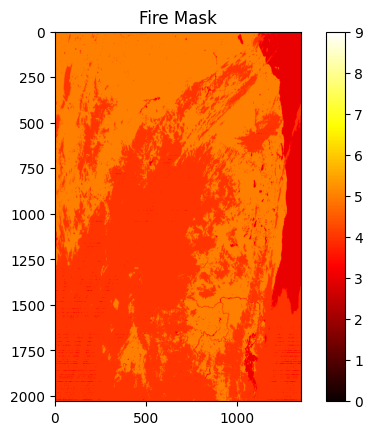

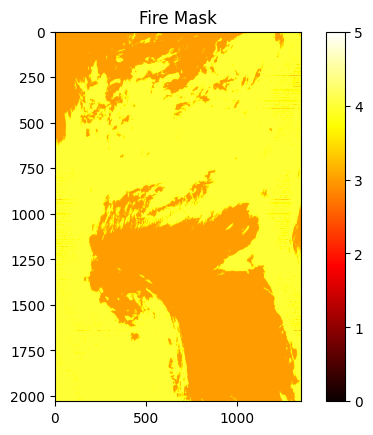

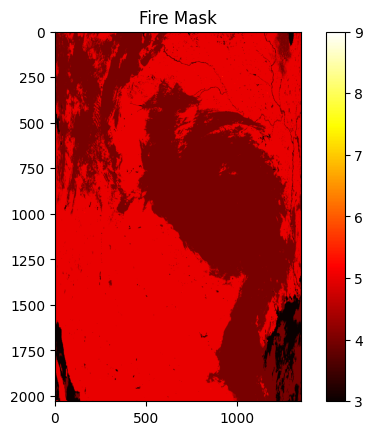

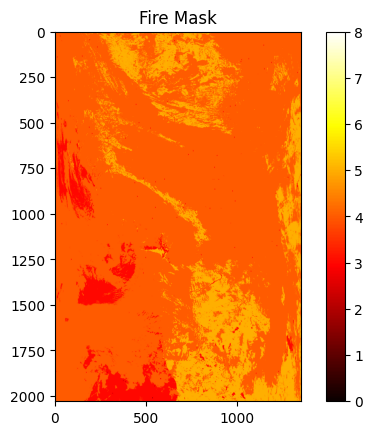

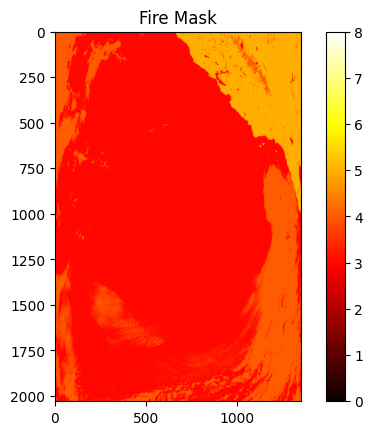

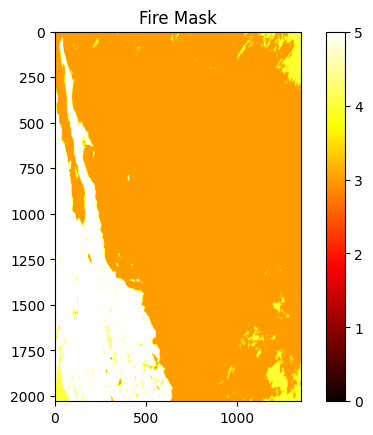

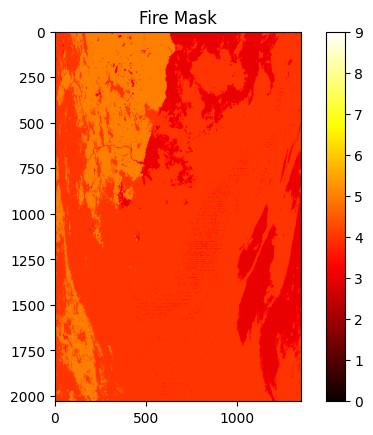

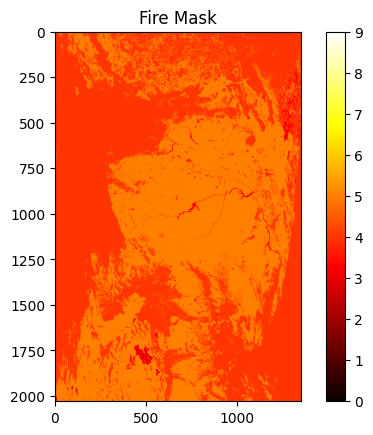

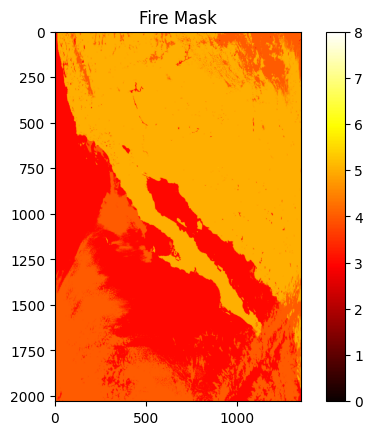

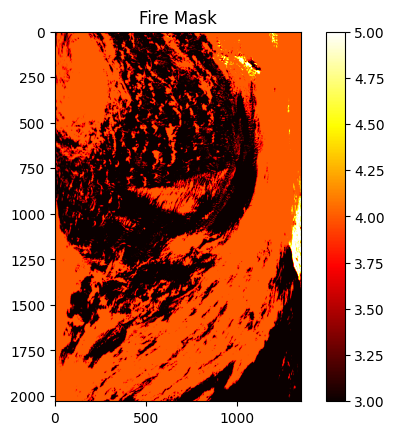

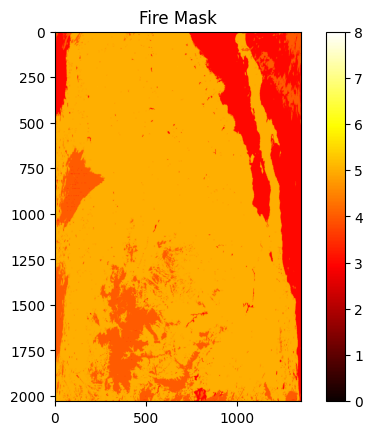

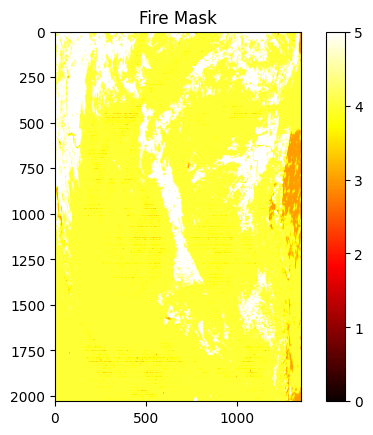

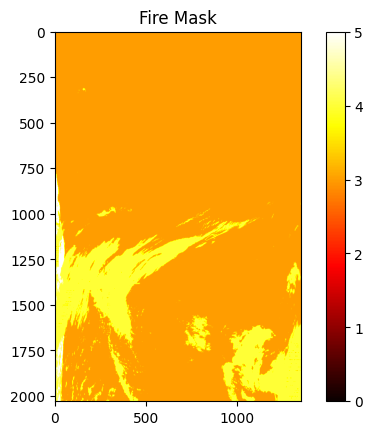

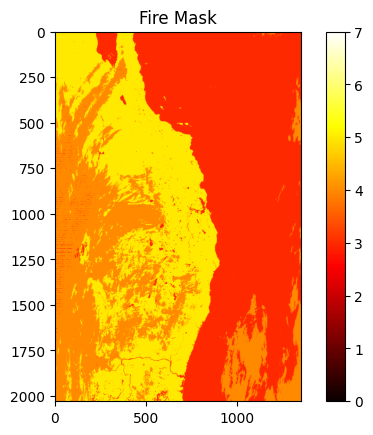

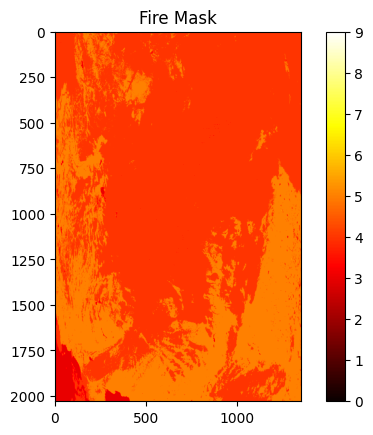

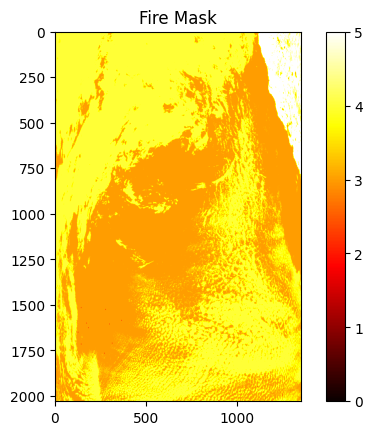

In [17]:
data_dir = '/Volumes/LaCie/Deep_Learning_Final_Project/Machine/Earth_Data2.0'
all_files = [f for f in os.listdir(data_dir) if f.endswith('.h5')]
selected_files = all_files[:100]  # Adjust as needed

for file_name in selected_files:
    hdf5_file_path = os.path.join(data_dir, file_name)
    with h5py.File(hdf5_file_path, 'r') as file:
        # Assuming 'fire mask' dataset exists, replace with your dataset name
        if 'fire mask' in file:
            data = file['fire mask'][()]
            # Visualize the 'fire mask' dataset
            plt.imshow(data, cmap='hot')  # 'hot' colormap is good for heatmaps
            plt.colorbar()
            plt.title('Fire Mask')
            plt.show()
        else:
            print(f"'fire mask' dataset not found in {file_name}")
